In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 4/insurance2.csv")

In [3]:
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
train.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [5]:
train.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


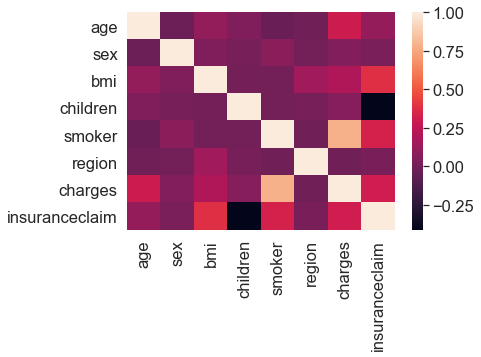

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

plt.figure(figsize=(6,4))
sns.heatmap(train.corr())

In [7]:
train.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [8]:
train["age"]=((train["age"]-train["age"].min())/(train["age"].max()-train["age"].min()))
train["bmi"]=((train["bmi"]-train["bmi"].min())/(train["bmi"].max()-train["bmi"].min()))
train["children"]=((train["children"]-train["children"].min())/(train["children"].max()-train["children"].min()))
train["charges"]=((train["charges"]-train["charges"].min())/(train["charges"].max()-train["charges"].min()))

In [9]:
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0.021739,0,0.321227,0.0,1,3,0.251611,1
1,0.000000,1,0.479150,0.2,0,2,0.009636,1
2,0.217391,1,0.458434,0.6,0,2,0.053115,0
3,0.326087,1,0.181464,0.0,0,1,0.333010,0
4,0.304348,1,0.347592,0.0,0,1,0.043816,1


In [10]:
dummy = pd.get_dummies(train["sex"])
dummy1 = pd.get_dummies(train["smoker"])
dummy2 = pd.get_dummies(train["region"])
dummy3 = pd.get_dummies(train["insuranceclaim"])

In [11]:
train = pd.concat([train,dummy], axis=1)
train = pd.concat([train,dummy1], axis=1)
train = pd.concat([train,dummy2], axis=1)
train = pd.concat([train,dummy3], axis=1)

In [12]:
train.columns = ['age','sex','bmi','children','smoker','region',
                 'charges','insuranceclaim','sex_0','sex_1','smoker_0',
                 'smoker_1','region_0','region_1','region_2','region_3','insuranceclaim_0','insuranceclaim_1']

In [13]:
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3,insuranceclaim_0,insuranceclaim_1
0,0.021739,0,0.321227,0.0,1,3,0.251611,1,1,0,0,1,0,0,0,1,0,1
1,0.000000,1,0.479150,0.2,0,2,0.009636,1,0,1,1,0,0,0,1,0,0,1
2,0.217391,1,0.458434,0.6,0,2,0.053115,0,0,1,1,0,0,0,1,0,1,0
3,0.326087,1,0.181464,0.0,0,1,0.333010,0,0,1,1,0,0,1,0,0,1,0
4,0.304348,1,0.347592,0.0,0,1,0.043816,1,0,1,1,0,0,1,0,0,0,1


In [14]:
train = train.drop(["sex", "smoker", "region", "insuranceclaim"], axis=1)

In [15]:
train.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_0', 'sex_1', 'smoker_0',
       'smoker_1', 'region_0', 'region_1', 'region_2', 'region_3',
       'insuranceclaim_0', 'insuranceclaim_1'],
      dtype='object')

In [16]:
x = train.drop('charges', axis=1)
y = train.charges

In [17]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3, random_state=42)

In [18]:
lin = LinearRegression()

In [19]:
lin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(lin.coef_)
lin.intercept_

[ 1.96518018e-01  2.55426960e-01  4.19021707e-03  5.72093423e+10
  5.72093423e+10 -9.96026574e+12 -9.96026574e+12 -2.17426568e+12
 -2.17426568e+12 -2.17426568e+12 -2.17426568e+12 -1.09640149e+13
 -1.09640149e+13]


23041336986996.523

In [21]:
predictions = lin.predict(x_test)
print('MSE value is %.2f'%sqrt(mean_squared_error(y_test,predictions)))

MSE value is 0.09


In [23]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="charges ~ age + bmi + children + sex_0 + sex_1 + smoker_0 + smoker_1 + region_0 + region_1 + region_2 + region_3 + insuranceclaim_0 + insuranceclaim_1",data=train).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     403.8
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:02:11   Log-Likelihood:                 1235.5
No. Observations:                1338   AIC:                            -2449.
Df Residuals:                    1327   BIC:                            -2392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.647e+10   3.37e+10      1.379      0.168   -1.97e+10    1.13e+11
age                  0.1919      0.009     21.831      0.000       0.175       0.209
bmi                  0.2286      0.019     12.118      0.000       0.192       0.266
children             0.0175      0.013      1.389      0.165      -0.007       0.042
sex_0             1.564e+11   1.13e+11      1.379      0.168   -6.61e+10    3.79e+11
sex_1             1.564e+11   1.13e+11      1.379      0.168   -6.61e+10    3.79e+11
smoker_0         -2.848e+11   2.07e+11     -1.379      0.168    -6.9e+11     1.2e+11
smoker_1         -2.848e+11   2.07e+11     -1.379      0.168    -6.9e+11     1.2e+11
region_0          -3.47e+09   2.52e+09     -1.379      0.168   -8.41e+09    1.47e+09
region_1          -3.47e+09   2.52e+09     -1.379      0.168   -8.41e+09    1.47e+09
region_2          -3.47e+09   2.52e+09     -1.379      0.168   -8.41e+09    1.47e+09
region_3          -3.47e+09   2.52e+09     -1.379      0.168   -8.41e+09    1.47e+09
insuranceclaim_0  8.543e+10    6.2e+10      1.379      0.168   -3.61e+10    2.07e+11
insuranceclaim_1  8.543e+10    6.2e+10      1.379      0.168   -3.61e+10    2.07e+11
==============================================================================
Omnibus:                      294.112   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.046
Skew:                           1.193   Prob(JB):                    1.95e-151
Kurtosis:                       5.600   Cond. No.                     1.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""